<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/US_reopen_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 4.6MB/s 
     |████████████████████████████████| 14.7MB 261kB/s 
     |████████████████████████████████| 10.4MB 24.3MB/s 


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [0]:
shapefile1 = '/content/drive/My Drive/Data/US Map/cb_2018_us_state_500k.shp'
datafile = '/content/drive/My Drive/Data/US Map/50states.csv'

In [0]:
gdf = gpd.read_file(shapefile1)

In [0]:
df = pd.read_csv(datafile)

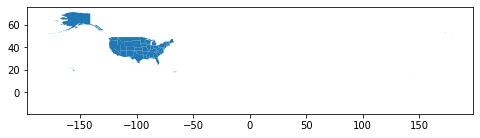

In [13]:
gdf.plot(figsize=(8,6))

In [23]:
gdf.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."


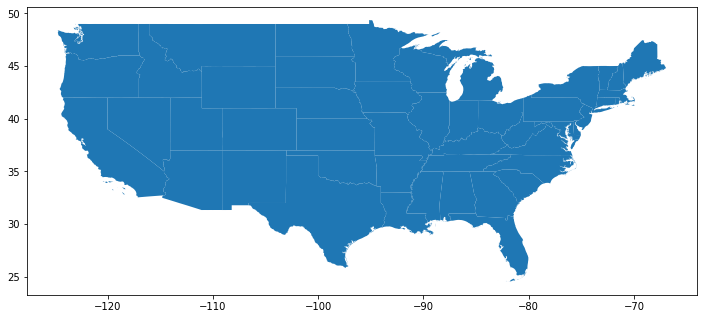

In [38]:
gdf.cx[-125:-50, 25:].plot(figsize=(12,10))

In [83]:
df.head()

,state,lockdowndate,reopendate,lastdate
0,Alabama,2020-04-03,None,2020-04-03
1,Alaska,None,2020-04-24,2020-04-23
2,Arizona,2020-04-30,None,2020-04-30
3,Arkansas,None,2020-05-04,2020-05-03
4,California,None,None,2020-05-30


In [0]:
def getdate(x):
  if len(x)>0:
    y = x.split('-')
    z = y[0] + '-' + y[1] + '-2020'
    return datetime.datetime.strptime(z, "%b-%d-%Y").date()

In [64]:
getdate('Apr-03')

datetime.date(2020, 4, 3)

In [0]:
df['lockdowndate'] = df['lockdowndate'].fillna('').apply(lambda x: getdate(x))

In [0]:
df['reopendate'] = df['reopendate'].fillna('').apply(lambda x: getdate(x))

In [0]:
def getcorrdate(x,y):
  if x==None:
    if y==None:
      return datetime.datetime.strptime('May-30-2020', "%b-%d-%Y").date()
    else:
      return y-datetime.timedelta(days=1)
  else:
    return x

In [0]:
df['lastdate'] = df.apply(lambda x: getcorrdate(x['lockdowndate'], x['reopendate']), axis=1)

In [0]:
def getcorrnum(x):
  if x < 0:
    return 0
  else:
    return x

In [0]:
df['numdays'] = (df['lastdate'] - datetime.datetime.strptime('Apr-26-2020', "%b-%d-%Y").date())/np.timedelta64(1, 'D')

In [0]:
df['numdays'] = df['numdays'].apply(lambda x: getcorrnum(x))

In [128]:
df.head()

,state,lockdowndate,reopendate,lastdate,numdays
0,Alabama,2020-04-03,None,2020-04-03,0.0
1,Alaska,None,2020-04-24,2020-04-23,0.0
2,Arizona,2020-04-30,None,2020-04-30,4.0
3,Arkansas,None,2020-05-04,2020-05-03,7.0
4,California,None,None,2020-05-30,34.0


In [0]:
gdfmerge = gdf.merge(df, left_on='NAME', right_on='state', how='left')

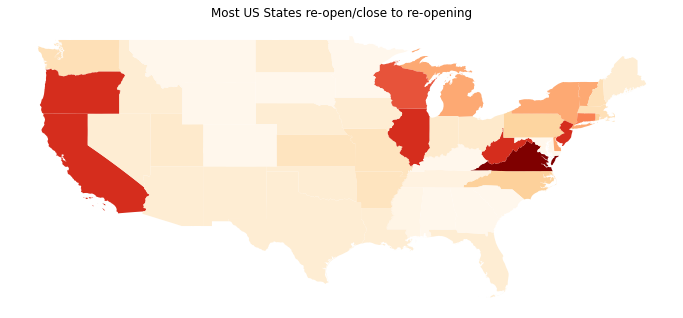

In [135]:
gdfmerge.cx[-125:-50, 25:].plot(figsize=(12,10), column='numdays', cmap='OrRd')
plt.title('Most US States re-open/close to re-opening')
plt.axis('off')
plt.savefig('usstatesreopen.png')